## Sample: How to use Kernel CMSM

### Data Information
- Generate 200 random data.
- A generated data is 1000 dimension.
- Data include 2 classes.
- Each class has 100 data.


### Data Architecture
- One data vector (or matrix) must be included python's list. e.g. list[i] = [n_feature_dim, n_set]
- Label indicates which class i-th element belongs. e.g. If label[i] = x, then list[i] belongs to x-class.
    - Type of label is np.ndarray. Range of label's value is [0, n_class - 1].


In [1]:
#Data Generator
import numpy as np
import kernel_cmsm
X = []
label = np.asarray([])
np.random.seed(1)

for i in range(100):
    x = np.random.rand(1000, 1) * 5
    x[0:100] += np.random.rand(100, 1) * 2
    x = x / np.linalg.norm(x)
    X.append(x)
    
for i in range(100):
    x = np.random.rand(1000, 1) * 5
    x[0:100] -= np.random.rand(100, 1) * 2
    x = x / np.linalg.norm(x)
    X.append(x)

cp = kernel_cmsm.Utils()
label = cp.create_label(100, 2)


print(type(X))
print(len(X))        
print(X[0].shape)  
print(label)
print(label.shape)            

<class 'list'>
200
(1000, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(200,)


In [2]:
# Learning the KGDS
import kernel_cmsm

## Each class subspace dimension
n_subdim = 20
## KGDS dimension
n_kgds_dim = 35
## Kernel parameter
n_sigma = np.sqrt(2)

kcmsm = kernel_cmsm.KernelCMSM(n_subdim = n_subdim, n_sigma = n_sigma)
print('Start learning')
## If do not set kgds dimension, use all dimension.
kcmsm.fit(X, label, n_kgds_dim)
print('Done')



Start learning
Done


Input data information:
- Data type is <class 'numpy.ndarray'>
- Data shape is (1000, 200) = (n_feature_dimension, n_samples)

Plot histgram of projected data into 1-dimension KGDS


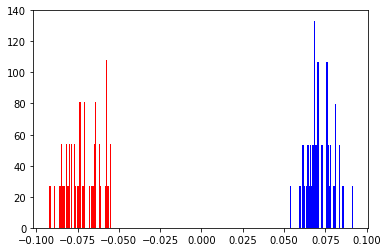

In [3]:
##### Project a vector data into KGDS #####
##### Projected data must be included 2D-matrix ####

import matplotlib.pyplot as plt
%matplotlib inline 

data = np.hstack(X[:])
print('Input data information:')
print('- Data type is', type(data))
print('- Data shape is', data.shape, '= (n_feature_dimension, n_samples)\n')

# KGDS projection of each data
prj_data = kcmsm.vectors_gds_projection(data[:,1:50])
prj_data2 = kcmsm.vectors_gds_projection(data[:,101:150])

# plot projected data
print('Plot histgram of projected data into 1-dimension KGDS')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(prj_data[0, :], bins=50, normed=True, color='red');
ax.hist(prj_data2[0, :], bins=50, normed=True, color='blue');

In [4]:
###### Classify input dataset using KCMSM #####

### Extract 2-class data 
input_dataset = data[:, 101:140]

### Input subspace dimension.
n_in_subdim = 5

## Set KGDS dimension
kcmsm.n_kgds_dim = 35

##### Usage1:#####
print('Similarity:', kcmsm.get_sim(input_dataset, n_in_subdim = n_in_subdim))

##### Usage2:#####
# KPCA
Xin = np.transpose(input_dataset)
Kin = kernel_cmsm.MathUtils.calc_kernelgram_matrix(Xin, Xin, sigma=kcmsm.n_sigma)
[eig_val, eig_vec] = np.linalg.eigh(Kin)
eig_id = np.argsort(eig_val)[::-1]
eig_id = eig_id[0:n_in_subdim]
eig_val = eig_val[eig_id]
eig_vec = eig_vec[:,eig_id]
subspace_basis = eig_vec / np.sqrt(eig_val)

# get similarities
print('Similarity:', kcmsm.get_sim(input_dataset, input_subspace = subspace_basis))


Similarity: [ 0.30997398  0.99490298]
Similarity: [ 0.30997398  0.99490298]


In [5]:
#### Project input_subspace, which is generated by input_dataset, to KGDS ####

input_dataset = data[:, 0:50];
n_in_subdim = 5

## Usage1:
projected_subspace = kcmsm.subspaces_gds_projection(input_dataset, n_subdim = n_in_subdim)
print(projected_subspace.shape)


## Usage2:
# KPCA
Xin = np.transpose(input_dataset)
Kin = kernel_cmsm.MathUtils.calc_kernelgram_matrix(Xin, Xin, sigma=kcmsm.n_sigma)
[eig_val, eig_vec] = np.linalg.eigh(Kin)

eig_id = np.argsort(eig_val)[::-1]
eig_id = eig_id[0:n_in_subdim]
eig_val = eig_val[eig_id]
eig_vec = eig_vec[:,eig_id]
subspace_basis = eig_vec / np.sqrt(eig_val)
# Projection subspace into KGDS
projected_subspace = kcmsm.subspaces_gds_projection(input_dataset, input_subspace = subspace_basis)
print(projected_subspace.shape)



(35, 5)
(35, 5)


In [8]:
## Debug

print(kcmsm.n_kgds_dim)
print(kcmsm.vectors_gds_projection(data[:,1]).shape)

35
(40, 1)
